# Gear Detection (Using Speed & RPM)

**Gear detection** in vehicles using speed and RPM data is a critical aspect of understanding and optimizing vehicle performance. By analyzing the relationship between these two key parameters, we can accurately determine the gear in which a vehicle is operating at any given moment. This analysis involves identifying patterns and thresholds that signify gear shifts, typically characterized by specific combinations of speed and RPM. 

Each different color corresponds to each respective gear.

C:\Users\Mukul\AppData\Local\Temp\ipykernel_3324\4227982262.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obddata_wgears['gear'] = obddata.apply(lambda x : get_gear(x, borders), axis=1)


<IPython.core.display.Javascript object>


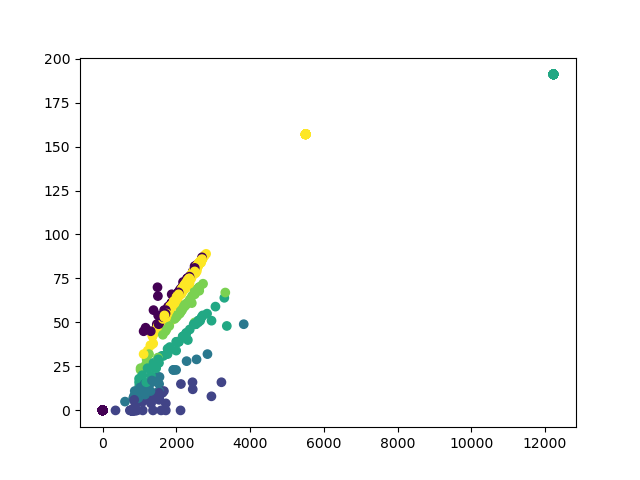

[]

In [2]:
import numpy as np
import pandas as pd
"""
A frmework script that tags the data points according to the gear and assigns it a color and plots the data. 
The gear detection is done by assuming the borders generated using any of the algorithms and placed in
the borders array. 
"""

%matplotlib notebook
import matplotlib.pyplot as plt


def get_gear(entry, borders):
    if entry['rpm'] == 0:
        return 0
    rat = entry['speed'] / entry['rpm'] * 1000
    if np.isnan(rat) or np.isinf(rat):
        return 0
    for i in range(0, len(borders)):
        if rat < borders[i] :
            return i + 1
    return 0

num_trips = 10
df = pd.read_csv("1.csv", index_col=0)
obddata = df[df['tripID']<num_trips]

# borders = get_segment_borders(obddata)
borders = [7.070124715964856, 13.362448319790191, 19.945056624926686, 27.367647318253834, 32.17327586520911]

obddata_wgears = obddata
obddata_wgears['gear'] = obddata.apply(lambda x : get_gear(x, borders), axis=1)

# print(obddata_wgears)

colors = [x * 50 for x in obddata_wgears['gear']]
plt.scatter(obddata_wgears['rpm'], obddata_wgears['speed'], c=colors)
plt.plot()

The following visualization plotted above is between the RPM and Speed signifies the following:
Here we have plotted 'RPM' on x-axis and 'Speed' on y-axis, hence lower line will represent Gear-1
on going up gears will increase from Gear-1 to Gear-5.

**1). Gear Shift Points: The five lines represent the different gear ratios in vehicle's transmission. As the driver accelerate or change speeds, the transmission shifts between these gears to maintain an optimal balance between engine power and efficiency.**

2). Smooth Shifts: Ideally, you want to see smooth transitions between these lines as you accelerate or decelerate. Abrupt changes or "jumps" between lines can indicate issues with the transmission or clutch.

3). Gear Ratio: Each line's angle indicates the gear ratio for that particular gear. Shallower angles typically represent lower gears, which provide more power and acceleration but at the cost of higher engine RPMs. Steeper angles represent higher gears, which allow for better fuel efficiency and lower RPMs at higher speeds (Shallower angles are not depicted clearly here).

A correlation coefficient of **0.794906** between RPM (Revolutions Per Minute) and speed indicates a strong positive linear relationship between these two variables. In practical terms, this means that as the engine's RPM increases, the vehicle's speed tends to increase significantly.

In [3]:
#We can view gear corresponding to each row, at what gear the respective vehicle is on
obddata

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,accData,mx,my,mz,gear
0,2017-10-31 18:45:59.000000,0,2.2,14.48,NaN,NaN,44.31,NaN,NaN,0.00,0.00,903.0,4,NaN,15.69,fff43fffe74808e73e03f33400ef33fbe13bf9d04100d9...,-2.93,-24.01,19.91,1
1,2017-10-31 18:46:00.000000,0,3.7,14.48,NaN,NaN,35.29,NaN,NaN,0.00,0.00,938.0,6,NaN,15.29,04e14104ed3d01ee3a08ec4c04f738fbd53c06d23dffde...,6.44,-21.96,27.23,1
2,2017-10-31 18:46:01.000000,0,3.9,14.54,NaN,NaN,29.41,NaN,NaN,0.00,0.00,1044.5,7,NaN,14.90,fdea4009e33c01ed3701ec4100f53b05e840fff33a04e8...,8.78,-15.81,25.18,1
3,2017-10-31 18:46:02.000000,0,3.9,14.56,NaN,NaN,53.73,NaN,NaN,0.00,0.00,1102.0,7,NaN,17.65,04e03c10de3a09e8400ce43b0ae63b01f43c02f24005ea...,10.54,-21.08,23.72,1
4,2017-10-31 18:46:03.000000,0,4.7,14.48,NaN,NaN,75.69,NaN,NaN,0.00,0.00,1626.5,10,NaN,23.53,16e0370ae73604e23b04e53900e542ffea44feed3d05d7...,5.86,-19.62,26.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,2017-10-14 10:32:07.000000,9,0.0,48.61,NaN,NaN,7.06,NaN,NaN,3.54,133.98,5508.5,157,NaN,7.06,0208400205410008420309410108440208420207410107...,-4.68,39.82,34.84,5
1520,2017-10-14 10:32:07.500000,9,0.0,48.61,NaN,NaN,7.06,NaN,NaN,3.54,133.98,5508.5,157,NaN,7.06,01074100074202094302073e0106410106410108410007...,-6.15,40.41,32.79,5
1521,2017-10-14 10:32:08.000000,9,0.0,48.61,NaN,NaN,7.06,NaN,NaN,3.54,133.98,5508.5,157,NaN,7.06,00074202073f010642010642010843010642030741ff06...,-5.56,37.48,31.92,5
1522,2017-10-14 10:32:09.000000,9,0.0,48.61,NaN,NaN,7.06,NaN,NaN,3.54,133.98,5508.5,157,NaN,7.06,01074101064100054002063f0107420207420107420108...,-4.98,38.06,33.09,5
